In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import itertools
import gc
import os
import sys
%matplotlib inline

In [11]:
marvel = pd.read_csv('C:\\Users\\99nai\\Downloads\\charcters_stats.csv')

In [12]:
marvel.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [13]:
marvel.shape

(611, 9)

In [14]:
marvel['Alignment'].value_counts() #good=superheroes bad=villian

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [16]:
marvel['Alignment']=='good'

0       True
1       True
2       True
3       True
4      False
       ...  
606     True
607     True
608     True
609     True
610    False
Name: Alignment, Length: 611, dtype: bool

In [18]:
good=marvel[marvel['Alignment']=='good']

In [19]:
good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [26]:
good.sort_values(by = ['Speed'] , ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
231,Flash III,good,63,10,100,60,83,32,348
333,Krypto,good,9,80,100,90,72,40,391
304,Jack of Hearts,good,63,55,100,30,70,30,348
418,Nova,good,38,60,100,100,100,25,423
230,Flash II,good,63,10,100,60,66,32,331


In [28]:
max_speed_good = good[good['Speed']==100]
max_speed_good

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
231,Flash III,good,63,10,100,60,83,32,348
304,Jack of Hearts,good,63,55,100,30,70,30,348
295,Impulse,good,50,10,100,60,63,60,343
525,Stardust,good,88,85,100,110,100,85,568
447,Quicksilver,good,63,28,100,60,57,56,364
232,Flash IV,good,63,10,100,32,59,48,312
537,Superman,good,100,100,100,100,94,85,579
333,Krypto,good,9,80,100,90,72,40,391
229,Flash I,good,63,10,100,50,57,32,312
85,Black Bolt,good,75,67,100,84,100,56,482


In [23]:
good.sort_values(by = ['Power'] , ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
609,Zatanna,good,75,10,23,28,100,56,292
546,Thor,good,69,100,92,100,100,85,546
511,Spawn,good,75,60,50,90,100,95,470
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467


In [31]:
max_power_good = good[good['Power']==100]
max_power_good.shape

(33, 9)

In [36]:
max_power_good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
525,Stardust,good,88,85,100,110,100,85,568
85,Black Bolt,good,75,67,100,84,100,56,482
418,Nova,good,38,60,100,100,100,25,423
361,Martian Manhunter,good,100,100,96,100,100,85,581
546,Thor,good,69,100,92,100,100,85,546


In [34]:
good[good['Name']=='Thor']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
546,Thor,good,69,100,92,100,100,85,546


In [35]:
good[good['Name']=='Superman']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
537,Superman,good,100,100,100,100,94,85,579


In [37]:
max_total = good.sort_values(by = ['Total'] , ascending=False).head()
max_total

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544


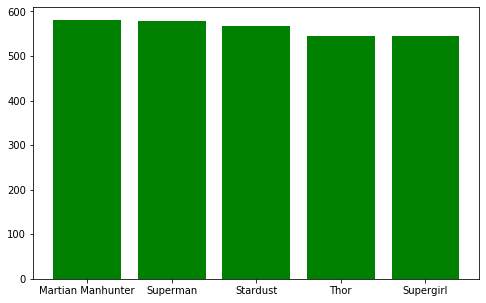

In [40]:
plt.figure(figsize = (8 , 5))
plt.bar(list(max_total['Name'])[0:5] , list(max_total['Total'])[0:5] , color='g')
plt.show()

In [42]:
bad=marvel[marvel['Alignment']=='bad']

In [43]:
bad.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


In [48]:
bad.sort_values(by = ['Speed'] , ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579


In [49]:
bad.sort_values(by = ['Intelligence'] , ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
336,Leader,bad,100,10,12,14,58,42,236
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429


In [53]:
bad_max_power = bad.sort_values(by = ['Total'] , ascending=False).head()

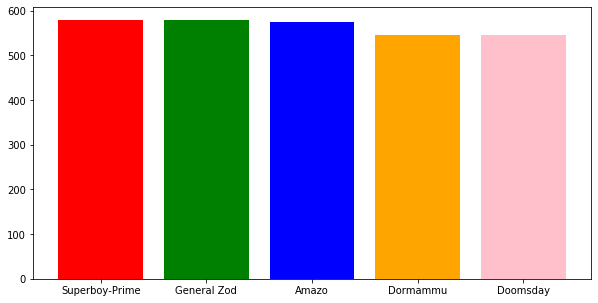

In [55]:
plt.figure(figsize=(10,5))
plt.bar(list(bad_max_power['Name'])[0:5] , list(bad_max_power['Total'])[0:5] , color=['red' , 'green' , 'blue' , 'orange' , 'pink'])
plt.show()

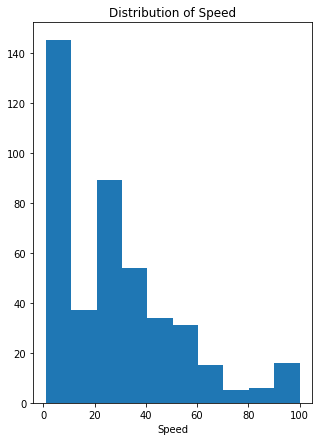

In [61]:
#Making a Histogram for speed for good heroes
plt.figure(figsize=(5 , 7))
plt.hist(good['Speed'])
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.show()

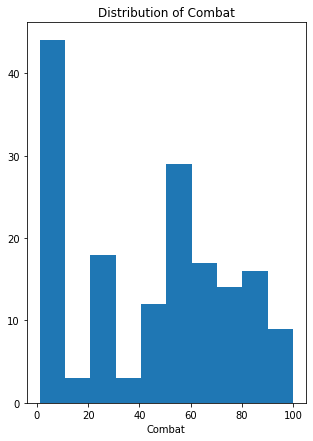

In [64]:
#Making a histogram for combat for supervillians
plt.figure(figsize=(5 , 7))
plt.hist(bad['Combat'])
plt.title('Distribution of Combat')
plt.xlabel('Combat')
plt.show()